<a href="https://colab.research.google.com/github/vmduarte/ANN_2021/blob/main/Trabalho_1_volume_arvores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [21]:
# para gerar o grafico no browser
%matplotlib inline

In [22]:
!git clone https://github.com/vmduarte/ANN_2021/
%cd ANN_2021

Cloning into 'ANN_2021'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 47 (delta 20), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
/content/mestrado/ANN_2021


In [23]:
# leitura dos dados
df=pd.read_csv("Artigo_volume_arvores.csv")

In [24]:
df.head(3)

,Unnamed: 0,Tipo,Local,Amostras,Especie,Estatistica,Dap,Altura,Volume
0,1,1,SP,207,Eucalyptus spp,XXX,3.01260,3.410,0.001608
1,2,1,SP,207,Eucalyptus spp,XXX,3.04158,3.433,0.001856
2,3,1,SP,207,Eucalyptus spp,XXX,3.11844,3.494,0.002514


In [25]:
df.tail(3)

,Unnamed: 0,Tipo,Local,Amostras,Especie,Estatistica,Dap,Altura,Volume
985,986,5,MT,30,Tectona grandis,XXX,15.3849,11.84145,0.073277
986,987,5,MT,30,Tectona grandis,XXX,15.7725,12.11125,0.075777
987,988,5,MT,30,Tectona grandis,XXX,15.8898,12.19290,0.076534


In [26]:
# separa as colunas de interesse (filtrar)
Index=[8]
Dat_Select=[]
Dat_Select=df.iloc[:,Index].copy()

In [27]:
Dat_Select.head(3)

,Volume
0,0.001608
1,0.001856
2,0.002514


In [28]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
        #x[i]=0.8*(x[i]-min_x)/(max_x-min_x)+0.1
    return x

In [29]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [30]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [31]:
DAT.tail(3)

,Volume
985,-0.939155
986,-0.937032
987,-0.936389


In [32]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None)
test=DAT.drop(train.index)

In [33]:
train.head(3)

,Volume
247,-0.801910
238,-0.844862
739,-0.355394


In [34]:
test.head(3)

,Volume
0,-1.000000
1,-0.999789
7,-0.977923


In [35]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0]]
x_test=test.iloc[:,[0]]
X_OLD=DAT_OLD.iloc[:,[0]]

In [36]:
# obtem a dependente volume (treino e teste)
Index=[0]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]

In [37]:
# define a rede neural 
model = MLPRegressor(solver='adam',activation='tanh',alpha=1e-5,max_iter=100,
                     hidden_layer_sizes=(5, 5),random_state=1)

In [38]:
# treina a rede neural
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(5, 5), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [39]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(x_train)
y_calc_test=model.predict(x_test)

In [40]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [41]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

In [42]:
# recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [43]:
train

,Volume
247,0.234936
238,0.184344
739,0.760883
420,1.054364
897,0.134304
...,...
444,1.896124
78,0.053303
887,0.155113
139,0.069811


In [44]:
# escolhe uma das resposta para fazer o grafico (Volume-treino)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['Volume'].copy()
resist_obs_train=train['Volume'].copy()

In [45]:
# escolhe uma das resposta para fazer o grafico (Volume-teste)
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['Volume'].copy()
resist_obs_test=test['Volume'].copy()

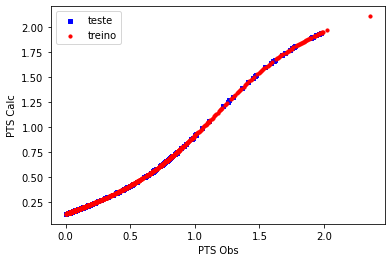

In [46]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('PTS Calc')
plt.xlabel('PTS Obs')
plt.show()

In [47]:
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

MSE teste= 0.008481747073342287
R^2 teste= 0.9679876596272652


In [48]:
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

MSE treino= 0.008531462721512357
R^2 treino= 0.9654360554307521
